# Testing reported Covid-19 deaths and cases for Poisson underdispersion

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import matplotlib

In [2]:
def poissonsamplevar(mu, n, perc=5, nrep=100, seed=42):
    np.random.seed(seed)
    
    v = np.zeros(nrep)
    for i in range(nrep):
        x = np.random.poisson(mu, size=n)
        v[i] = np.var(x)
    return np.percentile(v, perc)

In [3]:
def chop_and_test(x, window=7, nrep=100, perc=5, seed=42):
    length = np.floor(x.size/window).astype(int)
    result = np.zeros(length)
    for i in range(length):
        tt = x[i*window:(i+1)*window].copy()
        tt[tt<0] = 0
        if np.var(tt) < poissonsamplevar(np.mean(tt), window, 
                                         nrep=nrep, perc=perc, seed=seed):
            result[i] = 1
    return result

In [4]:
def chop_and_ratio(x, window=7):
    length = np.floor(x.size/window).astype(int)
    result = np.zeros(length)
    for i in range(length):
        tt = x[i*window:(i+1)*window].copy()
        tt[tt<0] = 0
        if np.mean(tt) > 0:
            result[i] = np.mean(tt) / (np.var(tt) + .1)
        else:
            result[i] = 1
    return result

In [5]:
def criterion(test_results, cutoff=10, chunkcutoff=4):
    max_consecutive_length = len(max("".join(map(str, test_results.astype('int'))).split("0")))
    flag = np.sum(test_results) >= cutoff or max_consecutive_length >= chunkcutoff
    return flag

In [6]:
df = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')

countries = np.unique(df['Country'])
print(countries.size)

237


## Illustrations

In [5]:
nrep = 1_000_000

<IPython.core.display.Javascript object>


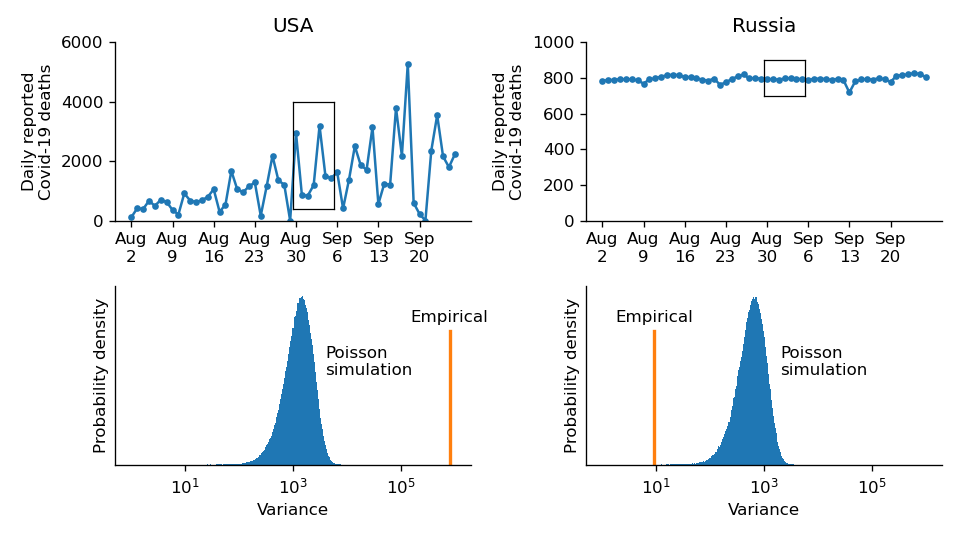

In [6]:
country = 'Russian Federation'

dates = df[df['Country']==country]['Date_reported'].values
ind = [(s>='2020-03-02') & (s<='2021-09-26') for s in dates]
deaths = df[df['Country']==country]['New_deaths'].values[ind]
cases  = df[df['Country']==country]['New_cases' ].values[ind]    
x = deaths[-56:]

plt.figure(figsize=(8,4.5))

plt.subplot(222)
plt.plot(x, '.-')
plt.ylim([0,1000])
plt.title('Russia')
plt.ylabel('Daily reported\nCovid-19 deaths')

plt.xticks(np.arange(0,50,7), 
           ['Aug\n2', 'Aug\n9', 'Aug\n16', 'Aug\n23', 'Aug\n30', 'Sep\n6', 'Sep\n13', 'Sep\n20'])

plt.plot([27.5,34.5], [700,700], 'k', linewidth=.75)
plt.plot([27.5,34.5], [900,900], 'k', linewidth=.75)
plt.plot([27.5,27.5], [700,900], 'k', linewidth=.75)
plt.plot([34.5,34.5], [700,900], 'k', linewidth=.75)

x = x[28:35]

In [7]:
print(x)
print(np.mean(x))
print(np.var(x))
print(np.std(x))

v = np.zeros(nrep)
np.random.seed(42)
for i in range(nrep):
    if (i+1) % 100_000 == 0:
        print('.', end='')
    v[i] = np.var(np.random.poisson(np.mean(x), size=x.size))
print('')
    
print(np.mean(v))
print(np.sum(v <= np.var(x)))
print(np.mean(v <= np.var(x)))

plt.subplot(224)
logbins = np.logspace(np.log10(1),np.log10(1_000_000), 1000)
plt.hist(v, bins=logbins)
plt.xscale('log')
plt.xlabel('Variance')
plt.yticks([])
plt.ylabel('Probability density');

yl = plt.ylim()
plt.plot([np.var(x), np.var(x)], [yl[0], yl[1]*.75], linewidth=2)
plt.ylim(yl)

plt.text(2000, yl[1]/2, 'Poisson\nsimulation', fontsize=10)
plt.text(np.var(x), yl[1]*.8, 'Empirical', fontsize=10, ha='center');

[792 795 790 798 799 796 793]
794.7142857142857
9.061224489795919
3.010186786529354
..........
680.9526111020409
7
7e-06


In [8]:
country = 'United States of America'

dates = df[df['Country']==country]['Date_reported'].values
ind = [(s>='2020-03-02') & (s<='2021-09-26') for s in dates]
deaths = df[df['Country']==country]['New_deaths'].values[ind]
cases  = df[df['Country']==country]['New_cases' ].values[ind]    
x = deaths[-56:]

plt.subplot(221)
plt.plot(x, '.-')
plt.ylim([0,6000])
plt.title('USA')
plt.ylabel('Daily reported\nCovid-19 deaths')

plt.xticks(np.arange(0,50,7), 
           ['Aug\n2', 'Aug\n9', 'Aug\n16', 'Aug\n23', 'Aug\n30', 'Sep\n6', 'Sep\n13', 'Sep\n20'])

plt.plot([27.5,34.5], [400,400], 'k', linewidth=.75)
plt.plot([27.5,34.5], [4000,4000], 'k', linewidth=.75)
plt.plot([27.5,27.5], [400,4000], 'k', linewidth=.75)
plt.plot([34.5,34.5], [400,4000], 'k', linewidth=.75)

x = x[28:35]

In [9]:
print(x)
print(np.mean(x))
print(np.var(x))
print(np.std(x))

v = np.zeros(nrep)
np.random.seed(42)
for i in range(nrep):
    if (i+1) % 100_000 == 0:
        print('.', end='')
    v[i] = np.var(np.random.poisson(np.mean(x), size=x.size))
print('')
    
print(np.mean(v))
print(np.sum(v <= np.var(x)))
print(np.mean(v <= np.var(x)))

plt.subplot(223)
logbins = np.logspace(np.log10(1),np.log10(1_000_000), 1000)
plt.hist(v, bins=logbins)
plt.xscale('log')
plt.xlabel('Variance')
plt.yticks([])
plt.ylabel('Probability density')

yl = plt.ylim()
plt.plot([np.var(x), np.var(x)], [yl[0], yl[1]*.75], linewidth=2)
plt.ylim(yl)

plt.text(4000, yl[1]/2, 'Poisson\nsimulation', fontsize=10)
plt.text(np.var(x), yl[1]*.8, 'Empirical', fontsize=10, ha='center');

[2943  851  839 1191 3191 1499 1432]
1706.5714285714287
800179.3877551021
894.5274661826221
..........
1462.444675428571
1000000
1.0


In [10]:
sns.despine()
plt.tight_layout()

plt.savefig('img/illustation.png', dpi=200)
plt.savefig('img/illustation.pdf')

## Significance cutoffs

In [26]:
np.random.seed(42)
X = (np.random.rand(1_000_000, 84) < 0.05).astype(int)

ls = np.zeros(X.shape[0])
for i,x in enumerate(X):
    if (i+1) % 100_000 == 0:
        print('.', end='')
    ls[i] = len(max("".join(map(str, x)).split("0")))
print('')

from scipy.stats import binom
print(1 - binom.cdf(11, 84, 0.05))

print(np.mean(np.sum(X, axis=1) >= 12))

print(np.mean(ls >= 4))

print(np.mean((np.sum(X, axis=1) >= 12) | (ls >= 4)))

..........
0.0009572316929646885
0.000975
0.000485
0.001433


In [27]:
# np.random.seed(42)
# X = (np.random.rand(1_000_000, int(84/7)) < 0.05).astype(int)

# ls = np.zeros(X.shape[0])
# for i,x in enumerate(X):
#     if (i+1) % 100_000 == 0:
#         print('.', end='')
#     ls[i] = len(max("".join(map(str, x)).split("0")))
# print('')

print(1 - binom.cdf(3, 84/7, 0.05))

# print(np.mean(np.sum(X, axis=1) >= 3))

# print(np.mean(ls >= 3))

# print(np.mean((np.sum(X, axis=1) >= 3) | (ls >= 3)))

0.0022364032297278458


## Screening for underdispersion

In [32]:
dates = df[df['Country']==country]['Date_reported'].values
ind = [(s>='2020-03-02') & (s<='2021-10-10') for s in dates]
print(np.sum(ind)/7)    

237
84.0


In [29]:
print('== DEATHS ==')

table_deaths = []
countries_deaths = []

for country in countries:
    dates = df[df['Country']==country]['Date_reported'].values
    ind = [(s>='2020-03-02') & (s<='2021-10-10') for s in dates]
    deaths = df[df['Country']==country]['New_deaths'].values[ind]
    cases  = df[df['Country']==country]['New_cases' ].values[ind]    
    
    d = chop_and_test(deaths, window=7, nrep=1000)
    
    if criterion(d, cutoff=12, chunkcutoff=4):
        print(f'{country[:20]:20}', end='')
        for i in range(d.size):
            if d[i]==1:
                print('*', end='')
            else:
                print('.', end='')
        print('')
        
        countries_deaths.append(country)
        table_deaths.append(d)

== DEATHS ==
Albania             .................*.......**....***......*........*..*.*..*..................*.***...
Algeria             ..........*****.**.....*...........................**...*.*.***.*...****............
Azerbaijan          ................****......*.****..*.....**.......*.*.....***..**..............*....*
Belarus             ......*.....*..******.******.****....***************************..****************.*
Egypt               ................**...............******.**.****......**...**.***.*.............*..**
El Salvador         .........*.......**.....**..*...*****...***..**..***..**..**.****...***.*.*..*****..
Kyrgyzstan          .....................................**.......*...............*.*...*.***********..*
Lebanon             .........................................*..................**..*********..**....**.
Russian Federation  ..........................................................................*.****....
Saudi Arabia        .........**...*.*.....

In [30]:
print('== CASES ==')

table_cases = []
countries_cases = []

for country in countries:
    dates = df[df['Country']==country]['Date_reported'].values
    ind = [(s>='2020-03-02') & (s<='2021-10-10') for s in dates]
    deaths = df[df['Country']==country]['New_deaths'].values[ind]
    cases  = df[df['Country']==country]['New_cases' ].values[ind]    
    
    d = chop_and_test(cases, window=7, nrep=1000)
    
    if criterion(d, cutoff=12, chunkcutoff=4):
        print(f'{country[:20]:20}', end='')
        for i in range(d.size):
            if d[i]==1:
                print('*', end='')
            else:
                print('.', end='')
        print('')
        
        countries_cases.append(country)
        table_cases.append(d)

== CASES ==
Qatar               ............................................**....*****.............................
Tajikistan          ...............**.**********.***********.............................*...***.*......
United Arab Emirates.......................................................................****...*.....


<IPython.core.display.Javascript object>


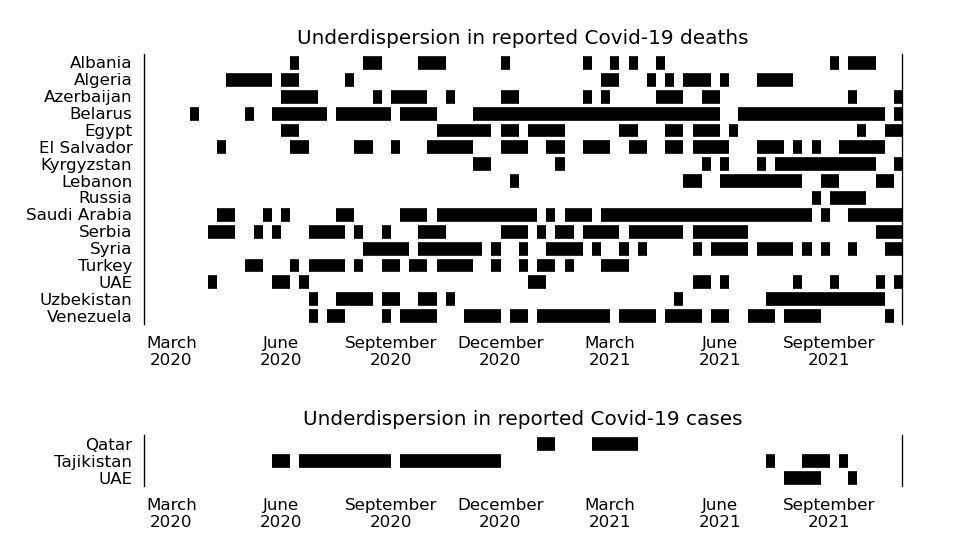

In [32]:
renames = {'Republic of Moldova': 'Moldova',
           'Russian Federation': 'Russia',
           'Syrian Arab Republic': 'Syria',
           'United Arab Emirates': 'UAE',
           'Venezuela (Bolivarian Republic of)': 'Venezuela'}

countries_deaths = [renames[c] if c in renames else c for c in countries_deaths]
countries_cases  = [renames[c] if c in renames else c for c in countries_cases]

plt.figure(figsize=(8, 4.5))
plt.set_cmap('Greys')

ax = plt.axes([.15,.4,.79,.5])
plt.title('Underdispersion in reported Covid-19 deaths')
plt.imshow(np.array(table_deaths), aspect='auto')
plt.yticks(np.arange(len(countries_deaths)), countries_deaths)
plt.xticks(np.arange(3.5,80,12), ['March\n2020', 'June\n2020', 'September\n2020', 'December\n2020', 
                                  'March\n2021', 'June\n2021', 'September\n2021'])
plt.tick_params(left=False, bottom=False)

for i in range(-1,len(countries_deaths)):
    plt.plot([0, table_deaths[0].size], [i+.5,i+.5], 'w', linewidth=2)
    
plt.xlim([.5, table_cases[0].size-.5])

    
ax = plt.axes([.15,.1,.79,.5/len(countries_deaths)*len(countries_cases)])
plt.title('Underdispersion in reported Covid-19 cases')
plt.imshow(np.array(table_cases), aspect='auto')
plt.yticks(np.arange(len(countries_cases)), countries_cases)
plt.xticks(np.arange(3.5,80,12), ['March\n2020', 'June\n2020', 'September\n2020', 'December\n2020', 
                                  'March\n2021', 'June\n2021', 'September\n2021'])
plt.tick_params(left=False, bottom=False)

for i in range(-1,len(countries_cases)):
    plt.plot([0, table_cases[0].size], [i+.5,i+.5], 'w', linewidth=2)
    
plt.xlim([.5, table_cases[0].size-.5])
    
sns.despine(bottom=True, right=False)

plt.savefig('img/testing.png', dpi=200)
plt.savefig('img/testing.pdf')

## Screening for underdispersion over weeks

In [33]:
print('== DEATHS OVER WEEKS ==')

# table_deaths = []
# countries_deaths = []

for country in countries:
    dates = df[df['Country']==country]['Date_reported'].values
    ind = [(s>='2020-03-02') & (s<='2021-10-10') for s in dates]
    deaths = df[df['Country']==country]['New_deaths'].values[ind]
    cases  = df[df['Country']==country]['New_cases' ].values[ind]    
    
    deaths = deaths.squeeze().reshape(int(deaths.size/7), 7).sum(axis=1).squeeze()
    d = chop_and_test(deaths, window=7, nrep=1000)
    
    if criterion(d, cutoff=3, chunkcutoff=3):
        print(f'{country[:20]:20}', end='')
        for i in range(d.size):
            if d[i]==1:
                print('*', end='')
            else:
                print('.', end='')
        print('')
        
#         countries_deaths.append(country)
#         table_deaths.append(d)

== DEATHS OVER WEEKS ==
Belarus             ......***.*.
Nicaragua           ..*..*******


In [34]:
print('== CASES OVER WEEKS ==')

# table_deaths = []
# countries_deaths = []

for country in countries:
    dates = df[df['Country']==country]['Date_reported'].values
    ind = [(s>='2020-03-02') & (s<='2021-10-10') for s in dates]
    deaths = df[df['Country']==country]['New_deaths'].values[ind]
    cases  = df[df['Country']==country]['New_cases' ].values[ind]    
    
    cases = cases.squeeze().reshape(int(cases.size/7), 7).sum(axis=1).squeeze()
    d = chop_and_test(cases, window=7, nrep=1000)
    
    if criterion(d, cutoff=3, chunkcutoff=3):
        print(f'{country[:20]:20}', end='')
        for i in range(d.size):
            if d[i]==1:
                print('*', end='')
            else:
                print('.', end='')
        print('')
        
#         countries_deaths.append(country)
#         table_deaths.append(d)

== CASES OVER WEEKS ==


## Quantifying underdispersion

<IPython.core.display.Javascript object>


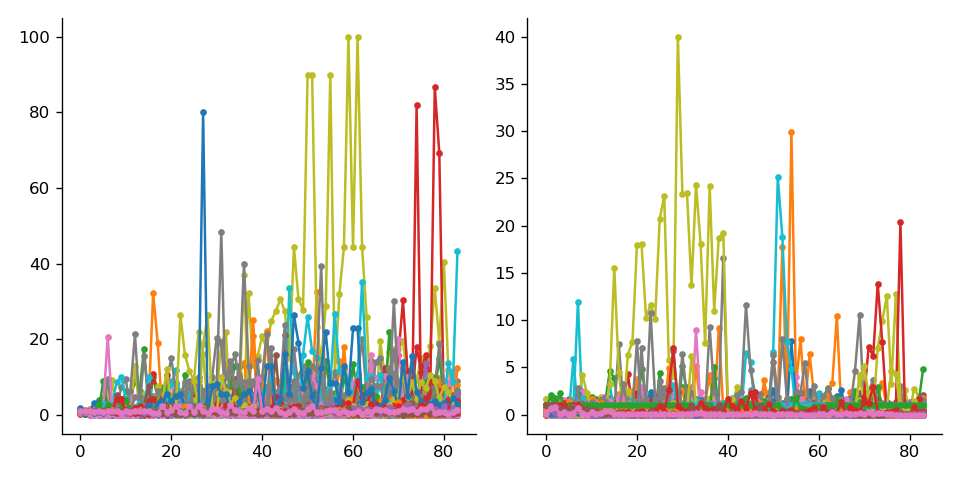

In [7]:
meanratios_deaths = np.zeros(countries.size)
maxratios_deaths = np.zeros(countries.size)
meanratios_cases = np.zeros(countries.size)
maxratios_cases = np.zeros(countries.size)

plt.figure(figsize=(8,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for i,country in enumerate(countries):
    dates = df[df['Country']==country]['Date_reported'].values
    ind = [(s>='2020-03-02') & (s<='2021-10-10') for s in dates]
    deaths = df[df['Country']==country]['New_deaths'].values[ind]
    cases = df[df['Country']==country]['New_cases'].values[ind]

    d = chop_and_ratio(deaths, window=7)
    meanratios_deaths[i] = np.mean(d)    
    maxratios_deaths[i] = np.max(d)    
    plt.sca(ax1)
    plt.plot(d, '.-')

    d = chop_and_ratio(cases, window=7)
    meanratios_cases[i] = np.mean(d)    
    maxratios_cases[i] = np.max(d)   
    plt.sca(ax2)
    plt.plot(d, '.-')
    
sns.despine()
plt.tight_layout()

In [8]:
ind = np.argsort(meanratios_deaths)[::-1][:5]
for i in ind:
    print(f'{countries[i][:20]:20} {meanratios_deaths[i]:.2f}')
print('')

ind = np.argsort(maxratios_deaths)[::-1][:5]
for i in ind:
    print(f'{countries[i][:20]:20} {maxratios_deaths[i]:.2f}')
print('')

ind = np.argsort(meanratios_cases)[::-1][:5]
for i in ind:
    print(f'{countries[i][:20]:20} {meanratios_cases[i]:.2f}')
print('')

ind = np.argsort(maxratios_cases)[::-1][:5]
for i in ind:
    print(f'{countries[i][:20]:20} {maxratios_cases[i]:.2f}')

Belarus              18.39
Serbia               6.47
Saudi Arabia         6.39
Venezuela (Bolivaria 6.33
Syrian Arab Republic 4.70

Belarus              100.00
Russian Federation   86.75
Venezuela (Bolivaria 80.00
Turkey               48.47
Serbia               43.30

Tajikistan           5.69
Syrian Arab Republic 1.95
Egypt                1.68
Qatar                1.30
Liechtenstein        1.02

Tajikistan           39.96
Egypt                29.86
Qatar                25.15
United Arab Emirates 20.38
Syrian Arab Republic 16.61


<IPython.core.display.Javascript object>


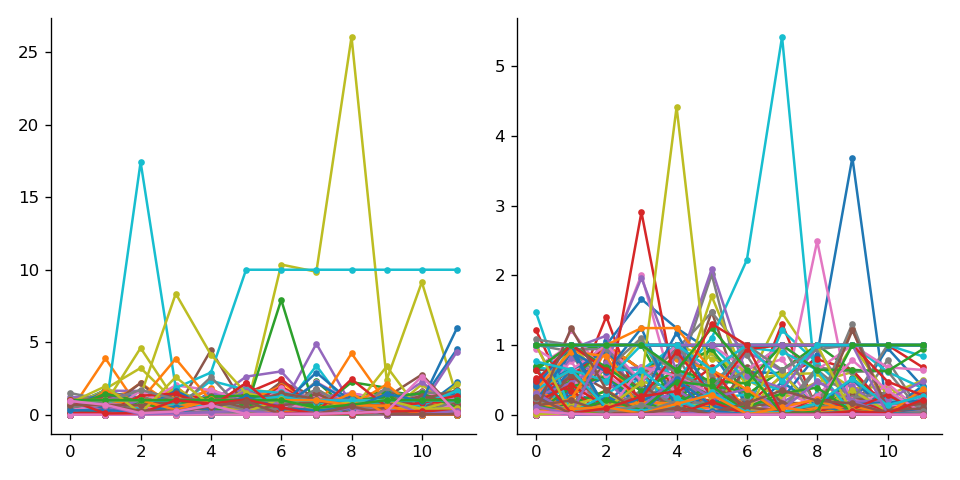

In [9]:
meanratios_deaths_weekly = np.zeros(countries.size)
maxratios_deaths_weekly = np.zeros(countries.size)
meanratios_cases_weekly = np.zeros(countries.size)
maxratios_cases_weekly = np.zeros(countries.size)

plt.figure(figsize=(8,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for i,country in enumerate(countries):
    dates = df[df['Country']==country]['Date_reported'].values
    ind = [(s>='2020-03-02') & (s<='2021-10-10') for s in dates]
    deaths = df[df['Country']==country]['New_deaths'].values[ind]
    cases = df[df['Country']==country]['New_cases'].values[ind]

    deaths = deaths.squeeze().reshape(int(deaths.size/7), 7).sum(axis=1).squeeze()
    cases = cases.squeeze().reshape(int(cases.size/7), 7).sum(axis=1).squeeze()

    d = chop_and_ratio(deaths, window=7)
    meanratios_deaths_weekly[i] = np.mean(d)    
    maxratios_deaths_weekly[i] = np.max(d)    
    plt.sca(ax1)
    plt.plot(d, '.-')

    d = chop_and_ratio(cases, window=7)
    meanratios_cases_weekly[i] = np.mean(d)    
    maxratios_cases_weekly[i] = np.max(d)   
    plt.sca(ax2)
    plt.plot(d, '.-')
    
sns.despine()
plt.tight_layout()

In [10]:
ind = np.argsort(meanratios_deaths_weekly)[::-1][:5]
for i in ind:
    print(f'{countries[i][:20]:20} {meanratios_deaths_weekly[i]:.2f}')
print('')

ind = np.argsort(maxratios_deaths_weekly)[::-1][:5]
for i in ind:
    print(f'{countries[i][:20]:20} {maxratios_deaths_weekly[i]:.2f}')
print('')

ind = np.argsort(meanratios_cases_weekly)[::-1][:5]
for i in ind:
    print(f'{countries[i][:20]:20} {meanratios_deaths_weekly[i]:.2f}')
print('')

ind = np.argsort(maxratios_cases_weekly)[::-1][:5]
for i in ind:
    print(f'{countries[i][:20]:20} {maxratios_cases_weekly[i]:.2f}')

Nicaragua            7.75
Belarus              5.50
Tajikistan           1.77
Cabo Verde           1.47
Brunei Darussalam    1.20

Belarus              26.07
Nicaragua            17.43
Tajikistan           8.35
Paraguay             7.92
Venezuela (Bolivaria 5.97

Tonga                1.00
Cook Islands         1.00
Tuvalu               1.00
Pitcairn Islands     1.00
Niue                 1.00

Nicaragua            5.42
Tajikistan           4.42
Brunei Darussalam    3.69
Saint Vincent and th 2.91
Jersey               2.49


In [11]:
maxmeanratio = np.amax(np.concatenate((
    meanratios_cases[:,np.newaxis],
    meanratios_deaths[:,np.newaxis],
    meanratios_cases_weekly[:,np.newaxis],
    meanratios_deaths_weekly[:,np.newaxis]),
        axis=1), axis=1)

In [12]:
ex = pd.read_csv('../excess-mortality/excess-mortality.csv')
con = ex['Country'].values
und = ex['Undercount ratio'].values

wmd2who = {'Moldova':'Republic of Moldova',
           'Russia': 'Russian Federation',
           'Bosnia': 'Bosnia and Herzegovina',
           'Bolivia': 'Bolivia (Plurinational State of)',
           'United States': 'United States of America',
           'United Kingdom': 'The United Kingdom',
           'Kosovo':'Kosovo[1]',
           'Iran':'Iran (Islamic Republic of)',
           'South Korea':'Republic of Korea'}

con = np.array([c if c not in wmd2who else wmd2who[c] for c in con])
print('Not found: ', con[~np.isin(con, countries)])

undercounts = np.zeros(countries.size) * np.nan
for i,c in enumerate(countries):
    if c in con:
        undercounts[i] = und[con==c]

Not found:  ['Hong Kong' 'Macao' 'Taiwan' 'Transnistria']


In [13]:
significant_underdispersion_list = [
    'Albania', 'Algeria', 'Azerbaijan', 'Belarus',
    'Egypt', 'El Salvador', 'Kyrgyzstan', 'Lebanon',
    'Russian Federation', 'Saudi Arabia', 'Serbia', 
    'Syrian Arab Republic', 'Turkey', 'United Arab Emirates',
    'Uzbekistan', 'Venezuela (Bolivarian Republic of)', 'Qatar',
    'Tajikistan', 'Nicaragua'
]

signif = np.isin(countries, significant_underdispersion_list)

<IPython.core.display.Javascript object>


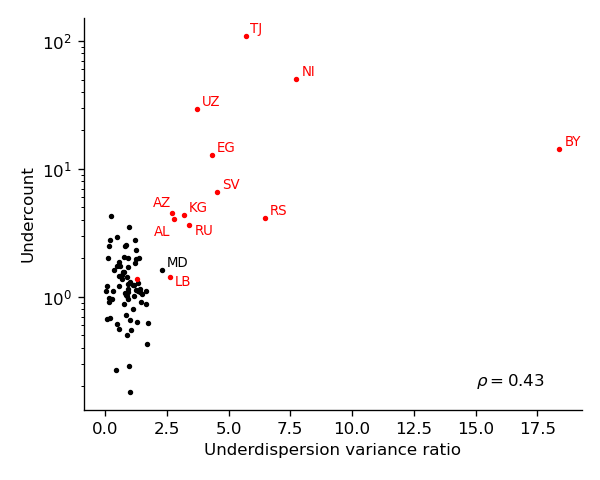

In [15]:
plt.figure(figsize=(5,4))
plt.scatter(maxmeanratio[~signif], undercounts[~signif], c='k', s=5)
plt.scatter(maxmeanratio[signif], undercounts[signif], c='r', s=5)
plt.yscale('log')

plt.xlabel('Underdispersion variance ratio')
plt.ylabel('Undercount')

shorten = {'Belarus': 'BY',
           'Nicaragua': 'NI',
           'Tajikistan': 'TJ',
           'Uzbekistan': 'UZ',
           'Egypt': 'EG',
           'El Salvador': 'SV',
           'Russian Federation': 'RU',
           'Lebanon': 'LB',
           'Republic of Moldova': 'MD',
           'Azerbaijan': 'AZ',
           'Kyrgyzstan': 'KG',
           'Serbia': 'RS',
           'Albania': 'AL',
           'Kazakhstan': 'KZ',
           'Monaco': 'MC'
          }

deltas = {'RU': [0, .8], 'LB': [0, .8], 'AZ': [-1, 1.05], 'AL': [-1, .7]}

ind = (maxmeanratio > 2) & ~np.isnan(undercounts) & signif
for i in np.where(ind)[0]:
    if shorten[countries[i]] in deltas:
        d = deltas[shorten[countries[i]]]
    else:
        d = [0, 1]
    
    plt.text(maxmeanratio[i]+.2 + d[0], undercounts[i] * 1.05 * d[1],
             shorten[countries[i]], fontsize=8, color='r')
    
ind = (maxmeanratio > 2) & ~np.isnan(undercounts) & ~signif
for i in np.where(ind)[0]:
    plt.text(maxmeanratio[i]+.2, undercounts[i] * 1.05, shorten[countries[i]], fontsize=8, color='k')

# ind = (maxmeanratio < 2) & (undercounts > 4) & ~np.isnan(undercounts) & ~signif
# for i in np.where(ind)[0]:
#     plt.text(maxmeanratio[i]+.2, undercounts[i] * 1.05, shorten[countries[i]], fontsize=8, color='#666666')
    
sns.despine()
plt.tight_layout()

rho = np.corrcoef(maxmeanratio[~np.isnan(undercounts)], undercounts[~np.isnan(undercounts)])[0,1]
plt.text(15, .2, fr'$\rho={rho:.2f}$', fontsize=10)

plt.savefig('img/correlation.png', dpi=200)
plt.savefig('img/correlation.pdf', dpi=200)

In [25]:
# Export as clean CSV

df_ratios = pd.DataFrame(
    np.concatenate(
        (
            meanratios_cases[:,np.newaxis],
            meanratios_deaths[:,np.newaxis],
            meanratios_cases_weekly[:,np.newaxis],
            meanratios_deaths_weekly[:,np.newaxis],
            maxmeanratio[:, np.newaxis]
        ),
        axis=1),
    index=countries,
    columns=['Underdispersion ratio (cases, daily)',
             'Underdispersion ratio (deaths, daily)',
             'Underdispersion ratio (cases, weekly)',
             'Underdispersion ratio (deaths, weekly)',
             'Underdispersion ratio (max)'])

df_ratios.to_csv('underdispersion-ratios.csv', float_format='%.2f')

## Russian regions

In [35]:
# https://docs.google.com/spreadsheets/d/1nCxvNcuZGNswsf97mliLikmUIsOrOGZtL-VI7xfN-Zw

df = pd.read_csv('https://docs.google.com/spreadsheets/d/1nCxvNcuZGNswsf97mliLikmUIsOrOGZtL-VI7xfN-Zw/export?format=csv&gid=375550280')

count = 0
print('== DEATHS ==')
for row in range(df.shape[0]):
    t = df.values[row,1:]
    t = np.diff(t[::-1])
    t[t<0] = 0
    
    a = np.where(df.columns[1:][::-1] == '30.03.2020')[0][0]
    b = np.where(df.columns[1:][::-1] == '10.10.2021')[0][0]
    ind = np.arange(a-1, b+1-1)
    t = t[ind]
    t = np.concatenate((np.zeros(28), t)) # append four weeks of zeros
    
    d = chop_and_test(t, window=7, nrep=1000)
    
    if criterion(d, cutoff=12, chunkcutoff=4):
        count += 1
        print(f'{df.values[row,0][:20]:20}', end='')
        for i in range(d.size):
            if d[i]==1:
                print('*', end='')
            else:
                print('.', end='')
        print('')
        
print(f'{count}/{df.shape[0]} regions')

== DEATHS ==
Алтайский край      .........................................*..*.*.*.**............*.....*.**..****..*.
Астраханская область.....................*.*............*****..**.*.*****.**************.**.***********.
Белгородская область..........................................*.**.*....*.**********......*.*.*.**...***
Брянская область    .....................................................................*....***.****.*
Владимирская область...............*.......*......*...............******.**.............................
Волгоградская област..........................***....*...*****.***.****.********.**.********.*********.*
Вологодская область .................................................***..****************.*.********.**
Забайкальский край  .................................**...........*...*****...*****.**...........*.*....
Ивановская область  .....................*............................*............*****..***.**....*.**
Иркутская область   ......................

In [37]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1nCxvNcuZGNswsf97mliLikmUIsOrOGZtL-VI7xfN-Zw/export?format=csv&gid=1771324359')

count = 0
which = np.zeros(df.shape[0]).astype(bool)

print('== CASES ==')
for row in range(df.shape[0]):
    t = df.values[row,1:]
    t = np.diff(t[::-1])
    
    a = np.where(df.columns[1:][::-1] == '30.03.2020')[0][0]
    b = np.where(df.columns[1:][::-1] == '10.10.2021')[0][0]
    ind = np.arange(a-1, b+1-1)
    t = t[ind]
    t = np.concatenate((np.zeros(28), t)) # append four weeks of zeros
    
    d = chop_and_test(t, window=7, nrep=1000)
    
    if criterion(d, cutoff=12, chunkcutoff=4):
        count += 1
        which[row] = True
        
        print(f'{df.values[row,0][:20]:20}', end='')
        for i in range(d.size):
            if d[i]==1:
                print('*', end='')
            else:
                print('.', end='')
        print('')
        
print('')
print(f'{count}/{df.shape[0]} regions')
print(f'Passed: {df.values[:,0][~which]}')

== CASES ==
Алтайский край      ..............***......*.*****..*.*********************************....************.
Амурская область    ...................**.**..**.*.....************.*..*.************......*************
Архангельская област................*.*.................*******.*.***...*.*********.**...*.****.*******.
Астраханская область....................*..*..........******.****************.*.*.***........*******..*.
Белгородская область............*****...**.*****..*..*..**************..***************.**..*********.*.
Брянская область    ...........****.*...........*......***...********..*********.******..****.**.****...
Владимирская область.............*.*****.********..*.***.***.***********..*************....**********...
Волгоградская област...............*******.*..***...********.********.*..***************....************
Вологодская область .......*........**.****.******...**.*...***.*****.*...******.*****.*..*************.
Воронежская область ...............**..*.**

Ямало-Ненецкий автон......................**..***..**.**********.*..*.*.*.*************....*******.*****
Ярославская область .............*..***********.**.......**************.***************....***********..

80/85 regions
Passed: ['Москва' 'Московская область' 'Ненецкий автономный округ'
 'Республика Алтай' 'Чукотский автономный округ']


## US states

There are currently 60 public health jurisdictions reporting cases of COVID-19. This includes the 50 states, the District of Columbia, New York City, the U.S. territories of American Samoa, Guam, the Commonwealth of the Northern Mariana Islands, Puerto Rico, and the U.S Virgin Islands as well as three independent countries in compacts of free association with the United States, Federated States of Micronesia, Republic of the Marshall Islands, and Republic of Palau. New York State’s reported case and death counts do not include New York City’s counts as they separately report nationally notifiable conditions to CDC.

In [38]:
df = pd.read_csv('https://data.cdc.gov/api/views/9mfq-cb36/rows.csv')

print(np.unique(df['state']).size)

60


In [39]:
print('== DEATHS ==')
for state in np.unique(df['state']):
    print('.', end='')
    dates = df[df['state']==state]['submission_date'].values
    dates = np.array([d[6:]+'-'+d[:2]+'-'+d[3:5] for d in dates])
    ind = np.argsort(dates)
    dates = dates[ind]
    t = df[df['state']==state]['new_death'].values
    t = t[ind]
    
    ind = [(s>='2020-03-02') & (s<='2021-10-10') for s in dates]
    t = t[ind]
   
    d = chop_and_test(t, window=7, nrep=1000)
    
    if criterion(d, cutoff=12, chunkcutoff=4):
        count += 1
        print(f'{state[:20]:20}', end='')
        for i in range(d.size):
            if d[i]==1:
                print('*', end='')
            else:
                print('.', end='')
        print('')


== DEATHS ==
............................................................

In [40]:
print('== CASES ==')
for state in np.unique(df['state']):
    print('.', end='')
    dates = df[df['state']==state]['submission_date'].values
    dates = np.array([d[6:]+'-'+d[:2]+'-'+d[3:5] for d in dates])
    ind = np.argsort(dates)
    dates = dates[ind]
    t = df[df['state']==state]['new_case'].values
    t = t[ind]
    
    ind = [(s>='2020-03-02') & (s<='2021-10-10') for s in dates]
    t = t[ind]
   
    d = chop_and_test(t, window=7, nrep=1000)
    
    if criterion(d, cutoff=12, chunkcutoff=4):
        count += 1
        print(f'{state[:20]:20}', end='')
        for i in range(d.size):
            if d[i]==1:
                print('*', end='')
            else:
                print('.', end='')
        print('')

== CASES ==
............................................................